In [57]:
import numpy as np
import pandas as pd
import nltk
# from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFile
import IPython.display as ipd
import skimage
import sklearn
from skimage import filters
from skimage import feature
from skimage.io import imread, imshow
from skimage.feature import hog
import os
import cv2
# import imblearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaseEnsemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML, display
from IPython.core.display import HTML, display
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
# import pytesseract as tess
import pickle
# import easyocr
import gc

C:\Users\abdul\AppData\Local\Temp\ipykernel_2972\126099009.py:48: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display
C:\Users\abdul\AppData\Local\Temp\ipykernel_2972\126099009.py:49: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [2]:
dftxt= pd.read_csv("labels.csv")

In [3]:
dftxt=dftxt.drop('Unnamed: 0',axis=1)

(array([1033.,    0., 3127.,    0.,    0., 2201.,    0.,  480.,    0.,
         151.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

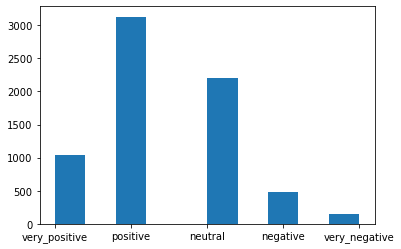

In [4]:
plt.hist(dftxt['overall_sentiment'])

In [5]:
dftxt['overall_sentiment'].value_counts()

positive         3127
neutral          2201
very_positive    1033
negative          480
very_negative     151
Name: overall_sentiment, dtype: int64

In [66]:
dftxt=dftxt.fillna('bad')
for x in range(len(dftxt)):
    if dftxt['text_corrected'][x]== "bad":
        if dftxt['text_ocr'][x] != "bad":
            print('done')
            dftxt['text_corrected'][x]= dftxt['text_ocr'][x]
            

done


In [68]:
#Filling nan values
dftxt['text_corrected'][4799]='im gonna build some fancy walls ven though i have millions of extra dollars in gonna make the mexicans pay for it'
dftxt['text_corrected'][6781]='if donald and hillary are together on a boat in the middle of the ocean and it sinks who survives america'
dftxt['text_corrected'][6784]='bruh whi this tub of margarine look like Donald Trump'
dftxt['text_corrected'][6786]='2016 election trump vs hillary still a better love story than twilight'

In [69]:
dftxt=dftxt.sort_values('image_name',ascending=True)

In [70]:
dftxt=dftxt.reset_index()

In [71]:
dftxt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              6992 non-null   int64 
 1   image_name         6992 non-null   object
 2   text_ocr           6992 non-null   object
 3   text_corrected     6992 non-null   object
 4   overall_sentiment  6992 non-null   object
dtypes: int64(1), object(4)
memory usage: 273.2+ KB


In [72]:
dftxt=dftxt.drop('index',axis=1)

In [74]:
import re
for x in range(len(dftxt)):
    dftxt['text_corrected'][x]=(re.sub(r"(@\[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", dftxt['text_corrected'][x])).lower()
import nltk
from nltk.corpus import stopwords
sw=stopwords.words('english')
for x in range(len(dftxt)):
    n=""
    for y in dftxt['text_corrected'][x].split():
        if y not in sw:
            n= n+" "+y
    dftxt['text_corrected'][x]=n.lower()

(array([4160.,    0.,    0.,    0.,    0., 2201.,    0.,    0.,    0.,
         631.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

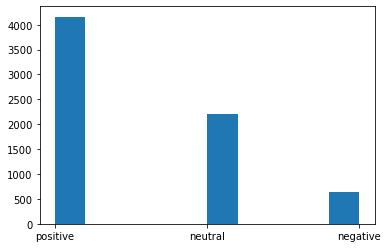

In [75]:
plt.hist(dftxt['overall_sentiment'])

In [77]:
dftxt['overall_sentiment'].loc[dftxt['overall_sentiment'] == "positive"] = 1
dftxt['overall_sentiment'].loc[dftxt['overall_sentiment'] == "negative"] = -1
dftxt['overall_sentiment'].loc[dftxt['overall_sentiment'] == "neutral"] = 0

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_df=0.5,analyzer ='word',max_features=13000, min_df=0.02)
vectorized = vectorizer.fit_transform(dftxt['text_corrected'])

In [79]:
X=vectorized
Y=list(dftxt['overall_sentiment'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.19, random_state=19)

# Text Model 1

In [82]:
#class_weight={2:0.1, 1:0.068650, 4: 0.147740, 0:0.314788, 3:0.447225}
tomodel1 = DecisionTreeClassifier(class_weight='balanced')
tomodel1.fit(X_train,y_train)

y_pred1=tomodel1.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred1))
print("F1 Score macro: ",f1_score(y_test, y_pred1,average='macro')) 
print("F1 Score w: ",f1_score(y_test, y_pred1,average='weighted')) 
print(classification_report(y_test, y_pred1))

Accuracy: 0.47027840481565086
F1 Score macro:  0.33789775679499595
F1 Score w:  0.46768799741972106
              precision    recall  f1-score   support

          -1       0.11      0.25      0.15       104
           0       0.32      0.18      0.23       419
           1       0.61      0.65      0.63       806

    accuracy                           0.47      1329
   macro avg       0.35      0.36      0.34      1329
weighted avg       0.48      0.47      0.47      1329



# Text Model 2

In [88]:
#from sklearn.ensemble import RandomForestClassifier
tomodel2 = RandomForestClassifier(class_weight='balanced')
tomodel2.fit(X_train,y_train)
y_pred2=tomodel2.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred2))
print("F1 Score: ",f1_score(y_test, y_pred2,average='weighted'))
print("F1 Score macro: ",f1_score(y_test, y_pred2,average='macro')) 

print(classification_report(y_test, y_pred2))

Accuracy: 0.5003762227238525
F1 Score:  0.49095312617253667
F1 Score macro:  0.35109129989804194
              precision    recall  f1-score   support

          -1       0.11      0.17      0.13       104
           0       0.35      0.22      0.27       419
           1       0.62      0.69      0.65       806

    accuracy                           0.50      1329
   macro avg       0.36      0.36      0.35      1329
weighted avg       0.49      0.50      0.49      1329



# Text Model 3

In [84]:
tomodel3 =  SVC(class_weight='balanced') 
tomodel3.fit(X_train,y_train)
y_pred3=tomodel3.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred3))
print("F1 Score: ",f1_score(y_test, y_pred3,average='weighted'))
print("F1 Score macro: ",f1_score(y_test, y_pred3,average='macro')) 

print(classification_report(y_test, y_pred3))

Accuracy: 0.48683220466516175
F1 Score:  0.4909704723674047
F1 Score macro:  0.3636881048552292
              precision    recall  f1-score   support

          -1       0.12      0.28      0.17       104
           0       0.38      0.23      0.29       419
           1       0.63      0.65      0.64       806

    accuracy                           0.49      1329
   macro avg       0.38      0.39      0.36      1329
weighted avg       0.51      0.49      0.49      1329



# Working with Images

In [11]:
#dftxt[dftxt['overall_sentiment']=='very_positive']['overall_sentiment']
dftxt['overall_sentiment'].loc[dftxt['overall_sentiment'] == "very_positive"] = "positive"
dftxt['overall_sentiment'].loc[dftxt['overall_sentiment'] == "very_negative"] = "negative"

#dftxt[dftxt['overall_sentiment']=='very_negative']['overall_sentiment']='negative'

In [91]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import skimage
from skimage.io import imread, imshow
path=r"C:\Users\abdul\Downloads\Downloads\final project\jpgs\\"
files=os.listdir(path)
images=[]
i=0
for file in files:
    x=skimage.transform.resize(imread(path+file),(100,100)).flatten()
    images.append(x)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [92]:
data={"Image Names": files, "Flattened image":list(images)}
df=pd.DataFrame(data)

In [95]:
df['sentiment']=dftxt['overall_sentiment']

In [97]:
df.head(5)

,Image Names,Flattened image,sentiment
0,image_1.jpg,"[0.42352941176470593, 0.42352941176470593, 0.4...",1
1,image_10.jpg,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1
2,image_100.jpg,"[0.10980392156862742, 0.10980392156862742, 0.1...",0
3,image_1000.jpg,"[0.2939458332193013, 0.2914764884796029, 0.282...",0
4,image_1001.jpg,"[0.9649324232827965, 0.9649324232827965, 0.964...",1


In [98]:
X=df['Flattened image']
Y=df['sentiment']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.19, random_state=19)

# Data Augmentation

In [14]:
x=dftxt[dftxt['overall_sentiment']=='negative']['image_name']

In [15]:
for y in range(len(dftxt)):
    dftxt['image_name'][y]=dftxt['image_name'][y].split('.')[0]+'.jpg'
    

In [17]:
negNames= list(dftxt[dftxt['overall_sentiment']=='negative']['image_name'])
nootNames = list(dftxt[dftxt['overall_sentiment']=='neutral']['image_name'])
posNames = list(dftxt[dftxt['overall_sentiment']=='positive']['image_name'])

In [18]:
import shutil

# ## Coversion to jpg

In [ ]:
# imageReadFolderPath = "C:/Users/I210337/OneDrive - FAST National University/Semester III/Courses/Programming For AI - Class/Final Project/Project/Processing/images/raw/"
# imageWriteFolderPath = "C:/Users/I210337/OneDrive - FAST National University/Semester III/Courses/Programming For AI - Class/Final Project/Project/Processing/images/pngs/"
# imageWriteFolderPath = "C:/Users/I210337/OneDrive - FAST National University/Semester III/Courses/Programming For AI - Class/Final Project/Project/Processing/images/jpgs/"
# imagesCount = 0
# for file in os.listdir(imageReadFolderPath):
# #     imagesCount += 1
# #     print(imagesCount)
# #     print(file)
    
#     fileNameWithoutExtension = file.split('.')[0]
#     fileNameWithoutExtension += ".jpg"
#     imageWritePath = imageWriteFolderPath + fileNameWithoutExtension
# #     print(imageWritePath)
    
#     image = Image.open(imageReadFolderPath + file)
#     if image.mode != 'RGB':
#         image = image.convert('RGB')
        
#     image = image.convert('L')

#     image.save(imageWritePath, optimize = True, quality = 25)
# #     if(imagesCount >= 100): break

# ##Moving to seperate folders by image type (negative/positive/neutral) 

In [99]:
src_path = r"C:\Users\abdul\Downloads\Downloads\final project\newimg\\"
dst_path = r"C:\Users\abdul\Downloads\Downloads\final project\newimg\Negative\\"
for file in negNames:
    # construct full file path
    source = src_path + file
    destination = dst_path+ file
    # move file
    shutil.move(source, destination)
    print('Moved:', file)


Moved: image_1010.jpg
Moved: image_1028.jpg
Moved: image_1033.jpg
Moved: image_1040.jpg
Moved: image_1046.jpg
Moved: image_1059.jpg
Moved: image_1061.jpg
Moved: image_1088.jpg
Moved: image_109.jpg
Moved: image_11.jpg
Moved: image_1113.jpg
Moved: image_1121.jpg
Moved: image_1135.jpg
Moved: image_1158.jpg
Moved: image_1165.jpg
Moved: image_1169.jpg
Moved: image_1171.jpg
Moved: image_1181.jpg
Moved: image_1187.jpg
Moved: image_1196.jpg
Moved: image_1228.jpg
Moved: image_1241.jpg
Moved: image_1242.jpg
Moved: image_1243.jpg
Moved: image_1262.jpg
Moved: image_1267.jpg
Moved: image_1282.jpg
Moved: image_1289.jpg
Moved: image_1291.jpg
Moved: image_1295.jpg
Moved: image_1319.jpg
Moved: image_1332.jpg
Moved: image_1340.jpg
Moved: image_1351.jpg
Moved: image_1360.jpg
Moved: image_1368.jpg
Moved: image_138.jpg
Moved: image_1397.jpg
Moved: image_1404.jpg
Moved: image_1419.jpg
Moved: image_1430.jpg
Moved: image_1450.jpg
Moved: image_1462.jpg
Moved: image_1467.jpg
Moved: image_1473.jpg
Moved: image_1

In [100]:
src_path = r"C:\Users\abdul\Downloads\Downloads\final project\newimg\\"
dst_path = r"C:\Users\abdul\Downloads\Downloads\final project\newimg\Positive\\"
for file in posNames:
    # construct full file path
    source = src_path + file
    destination = dst_path+ file
    # move file
    shutil.move(source, destination)
    print('Moved:', file)


Moved: image_1.jpg
Moved: image_10.jpg
Moved: image_1001.jpg
Moved: image_1002.jpg
Moved: image_1003.jpg
Moved: image_1004.jpg
Moved: image_1006.jpg
Moved: image_1007.jpg
Moved: image_1008.jpg
Moved: image_1009.jpg
Moved: image_101.jpg
Moved: image_1012.jpg
Moved: image_1016.jpg
Moved: image_1017.jpg
Moved: image_1018.jpg
Moved: image_1019.jpg
Moved: image_1020.jpg
Moved: image_1021.jpg
Moved: image_1022.jpg
Moved: image_1024.jpg
Moved: image_1025.jpg
Moved: image_1026.jpg
Moved: image_103.jpg
Moved: image_1031.jpg
Moved: image_1032.jpg
Moved: image_1035.jpg
Moved: image_1036.jpg
Moved: image_1037.jpg
Moved: image_1038.jpg
Moved: image_1039.jpg
Moved: image_1042.jpg
Moved: image_1044.jpg
Moved: image_1045.jpg
Moved: image_1047.jpg
Moved: image_105.jpg
Moved: image_1051.jpg
Moved: image_1053.jpg
Moved: image_1054.jpg
Moved: image_1056.jpg
Moved: image_1060.jpg
Moved: image_1062.jpg
Moved: image_1063.jpg
Moved: image_1065.jpg
Moved: image_1066.jpg
Moved: image_1067.jpg
Moved: image_1069.

In [101]:

src_path = r"C:\Users\abdul\Downloads\Downloads\final project\newimg\\"
dst_path = r"C:\Users\abdul\Downloads\Downloads\final project\newimg\Neutral\\"
for file in nootNames:
    # construct full file path
    source = src_path + file
    destination = dst_path+ file
    # move file
    shutil.move(source, destination)
    print('Moved:', file)


Moved: image_100.jpg
Moved: image_1000.jpg
Moved: image_1005.jpg
Moved: image_1011.jpg
Moved: image_1013.jpg
Moved: image_1014.jpg
Moved: image_1015.jpg
Moved: image_102.jpg
Moved: image_1023.jpg
Moved: image_1027.jpg
Moved: image_1029.jpg
Moved: image_1030.jpg
Moved: image_1034.jpg
Moved: image_104.jpg
Moved: image_1041.jpg
Moved: image_1043.jpg
Moved: image_1048.jpg
Moved: image_1049.jpg
Moved: image_1050.jpg
Moved: image_1052.jpg
Moved: image_1055.jpg
Moved: image_1057.jpg
Moved: image_1058.jpg
Moved: image_106.jpg
Moved: image_1064.jpg
Moved: image_1068.jpg
Moved: image_1070.jpg
Moved: image_1072.jpg
Moved: image_1073.jpg
Moved: image_1074.jpg
Moved: image_1075.jpg
Moved: image_1076.jpg
Moved: image_1077.jpg
Moved: image_1084.jpg
Moved: image_1087.jpg
Moved: image_1092.jpg
Moved: image_1093.jpg
Moved: image_1094.jpg
Moved: image_1096.jpg
Moved: image_1097.jpg
Moved: image_110.jpg
Moved: image_1101.jpg
Moved: image_1102.jpg
Moved: image_1103.jpg
Moved: image_1105.jpg
Moved: image_11

# ## Augmentation of images

In [102]:

# Importing necessary library
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline(r"C:\Users\abdul\Downloads\Downloads\final project\newimg\Neutral\\")

# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(len(posNames))

Initialised with 2201 image(s) found.
Output directory set to C:\Users\abdul\Downloads\Downloads\final project\newimg\Neutral\\output.

Processing <PIL.Image.Image image mode=L size=750x600 at 0x17D4551C730>: 100%|█| 4160/4160 [00:40<00:00, 103.65 Samples


In [103]:

# Importing necessary library
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline(r"C:\Users\abdul\Downloads\Downloads\final project\newimg\Negative\\")

# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(len(posNames))

Initialised with 631 image(s) found.
Output directory set to C:\Users\abdul\Downloads\Downloads\final project\newimg\Negative\\output.

Processing <PIL.Image.Image image mode=L size=630x840 at 0x17D44BF83A0>: 100%|█| 4160/4160 [00:38<00:00, 109.24 Samples


# ## Reading pos,neutrala and neg images from seperate folders

In [24]:
path=r"C:\Users\abdul\Downloads\Downloads\final project\newimg\Negative\output\\"
Negativefiles=os.listdir(path)
Negimages=[]
i=0
for file in Negativefiles:
    x=skimage.transform.resize(imread(path+file),(100,100)).flatten()
    Negimages.append(x)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [25]:
path=r"C:\Users\abdul\Downloads\Downloads\final project\newimg\Positive\\"
Positivefiles=os.listdir(path)
Posimages=[]
i=0
for file in Positivefiles:
    x=skimage.transform.resize(imread(path+file),(100,100)).flatten()
    Posimages.append(x)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [26]:
path=r"C:\Users\abdul\Downloads\Downloads\final project\newimg\Neutral\output\\"
Neutralfiles=os.listdir(path)
Neutralimages=[]
i=0
for file in Neutralfiles:
    x=skimage.transform.resize(imread(path+file),(100,100)).flatten()
    Neutralimages.append(x)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [31]:
p=[1]*len(Posimages)
n=[-1]*len(Negimages)
nu=[0]*len(Neutralimages)

In [45]:
labels=p+n+nu
actualdata=Posimages+Negimages+Neutralimages

In [46]:
X_train, X_test, y_train, y_test = train_test_split(actualdata, labels, test_size=0.19, random_state=51)

In [47]:
del labels,p,n,nu,actualdata,Posimages,Negimages,Neutralimages

In [48]:
from sklearn.ensemble import RandomForestClassifier
image1 =RandomForestClassifier()
image1.fit(X_train,y_train)
y_pred=image1.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred,average='weighted')) 
print("F1 Score Macro: ",f1_score(y_test, y_pred,average='macro'))


Accuracy: 0.5413153456998314
F1 Score:  0.5394230795501114
F1 Score Macro:  0.540580632475587


In [49]:
image2 = KNeighborsClassifier(n_neighbors=1)
image2.fit(X_train,y_train)
y_pred11=image2.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred11))
print("F1 Score weighted: ",f1_score(y_test, y_pred11,average='weighted')) 
print("F1 Score macro: ",f1_score(y_test, y_pred11,average='macro')) 

print(classification_report(y_test, y_pred11))

Accuracy: 0.49831365935919053
F1 Score weighted:  0.49427029111839826
F1 Score macro:  0.49421119325392554
              precision    recall  f1-score   support

          -1       0.51      0.62      0.56       800
           0       0.51      0.40      0.45       810
           1       0.47      0.48      0.48       762

    accuracy                           0.50      2372
   macro avg       0.50      0.50      0.49      2372
weighted avg       0.50      0.50      0.49      2372



In [50]:
# from sklearn.neural_network import MLPClassifier
# md = MLPClassifier()
# md.fit(X_train,y_train)
# y_pred2=md.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred2))
# print("F1 Score weighted: ",f1_score(y_test, y_pred2,average='weighted')) 
# print("F1 Score macro: ",f1_score(y_test, y_pred2,average='macro')) 

# print(classification_report(y_test, y_pred2))

In [51]:
image3 = ExtraTreesClassifier(class_weight='balanced')
image3.fit(X_train,y_train)
y_pred9=image3.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred9))
print("F1 Score weighted: ",f1_score(y_test, y_pred9,average='weighted')) 
print("F1 Score macro: ",f1_score(y_test, y_pred9,average='macro')) 

print(classification_report(y_test, y_pred9))


Accuracy: 0.5569139966273187
F1 Score weighted:  0.5538381279389102
F1 Score macro:  0.5552467387621464
              precision    recall  f1-score   support

          -1       0.57      0.53      0.55       800
           0       0.51      0.46      0.49       810
           1       0.58      0.68      0.63       762

    accuracy                           0.56      2372
   macro avg       0.56      0.56      0.56      2372
weighted avg       0.55      0.56      0.55      2372



In [52]:
# from sklearn.linear_model import LogisticRegression
# imodel2 =LogisticRegression(max_iter=1000)
# imodel2.fit(X_train,y_train)
# y_pred6=imodel2.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred6))
# print("F1 Score: ",f1_score(y_test, y_pred6,average='weighted'))
# print("F1 Score Macro: ",f1_score(y_test, y_pred6,average='macro'))



In [53]:
# md = AdaBoostClassifier()
# md.fit(X_train,y_train)
# y_pred8=md.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred8))
# print("F1 Score weighted: ",f1_score(y_test, y_pred8,average='weighted')) 
# print("F1 Score macro: ",f1_score(y_test, y_pred8,average='macro')) 

# print(classification_report(y_test, y_pred8))

In [54]:
image4 =  SVC()
image4.fit(X_train,y_train)
y_pred3=image4.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred3))
print("F1 Score: ",f1_score(y_test, y_pred3,average='weighted'))
print("F1 Score macro: ",f1_score(y_test, y_pred3,average='macro'))

print(classification_report(y_test, y_pred3))

Accuracy: 0.5021079258010118
F1 Score:  0.49709387626405355
F1 Score macro:  0.4987290081980598
              precision    recall  f1-score   support

          -1       0.51      0.48      0.49       800
           0       0.46      0.39      0.42       810
           1       0.53      0.65      0.58       762

    accuracy                           0.50      2372
   macro avg       0.50      0.50      0.50      2372
weighted avg       0.50      0.50      0.50      2372



In [60]:
# image5 =  GaussianNB()
# image5.fit(X_train,y_train)
# y_pred3=image5.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred3))
# print("F1 Score: ",f1_score(y_test, y_pred3,average='weighted'))
# print("F1 Score macro: ",f1_score(y_test, y_pred3,average='macro'))

# print(classification_report(y_test, y_pred3))

In [62]:
filename = 'model1.sav'
pickle.dump(image1, open(filename, 'wb'))
filename1 = 'model2.sav'
pickle.dump(image2, open(filename1, 'wb'))
filename2 = 'model3.sav'
pickle.dump(image3, open(filename2, 'wb'))
filename3 = 'model4.sav'
pickle.dump(image4, open(filename3, 'wb'))

In [129]:
filename4 = 'model5.sav'
pickle.dump(tomodel1, open(filename4, 'wb'))
filename5 = 'model6.sav'
pickle.dump(tomodel2, open(filename5, 'wb'))
filename6 = 'model7.sav'
pickle.dump(tomodel3, open(filename6, 'wb'))

In [101]:
loaded_imodel1 = pickle.load(open('model1.sav', 'rb'))#image
loaded_imodel2 = pickle.load(open('model2.sav', 'rb'))#image
loaded_imodel3 = pickle.load(open('model3.sav', 'rb'))#image
loaded_imodel4 = pickle.load(open('model4.sav', 'rb'))#image
loaded_imodel5 = pickle.load(open('model5.sav', 'rb'))#text
loaded_imodel6 = pickle.load(open('model6.sav', 'rb'))#text
loaded_imodel7 = pickle.load(open('model7.sav', 'rb'))#text

In [116]:
y_pred4=loaded_imodel1.predict(list(X_test))#image

In [117]:
y_pred5=loaded_imodel2.predict(list(X_test))#image

In [118]:
y_pred6=loaded_imodel3.predict(list(X_test))#image

In [119]:
y_pred7=loaded_imodel4.predict(list(X_test))#image

# Image Model 1

In [120]:
print("F1 Score macro: ",f1_score(list(y_test), list(y_pred4),average='macro'))

F1 Score macro:  0.6332331551121562


# Image Model 2

In [121]:
print("F1 Score macro: ",f1_score(list(y_test), list(y_pred5),average='macro'))

F1 Score macro:  0.6585589011886958


# Image Model 3

In [122]:
print("F1 Score macro: ",f1_score(list(y_test), list(y_pred6),average='macro'))

F1 Score macro:  0.6579992235866934


# Image Model 4

In [123]:
print("F1 Score macro: ",f1_score(list(y_test), list(y_pred7),average='macro'))

F1 Score macro:  0.4918779750736973


# Final Score

In [128]:
#There is an issue with this final f1 score as predictions on the text and images are taken on different data because
#of random state factor and data augmentation


#You could instead take mean of the individual f1 scores

# datapred={'Model 1':list(y_pred1),'Model 2':list(y_pred2),'Model 3':list(y_pred3),'Model 4':list(y_pred4),'Model 5':list(y_pred5),'Model 6':list(y_pred6), 'Model 7': list(y_pred7)}
# final=pd.DataFrame(datapred)
# newpred=final.mode(axis=1)[0]
# print("Final Overall F1 Macro Score: ",f1_score(list(y_test), list(newpred),average='macro')*100)

Final Overall F1 Macro Score:  57.17601796487274


# User Run/Flask Code

In [38]:
import skimage
from skimage.io import imread
import pickle
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
Path=r"C:\Users\abdul\Downloads\Downloads\final project\ncheck\\"
files=os.listdir(Path)
Path=Path+files[0]

from PIL import Image
from pytesseract import pytesseract

path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

pytesseract.tesseract_cmd = path_to_tesseract
img = Image.open(Path)
text = pytesseract.image_to_string(img)


labels={1:'positive',-1:'negative',0:'neutral'}
Test = text
Punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~0123456789'''
Test = Test.lower()
Test = Test.strip()
# Removing Punctuation
for Element in Test:
    if Element in Punctuation:
        Test = Test.replace(Element, "")
for Element in Test.split():
    if Element in stopwords.words('english'):
        Test = Test.replace(Element, "")



VectorizedX = TfidfVectorizer().fit_transform([Test, Test])
Size = abs(27-VectorizedX.shape[1])
VectorizedX = VectorizedX.toarray()
VectorizedX0 = np.append(VectorizedX[0], np.zeros((Size)))
VectorizedX1 = np.append(VectorizedX[1], np.zeros((Size)))
VectorizedX = np.c_[VectorizedX0, VectorizedX1]
VectorizedX = VectorizedX.T


 

Picture =skimage.transform.resize(imread(Path, as_gray=True),(100,100))
Picture = Picture.flatten()
Picture
Picture = np.c_[Picture, Picture]
Picture = Picture.T


loaded_model1 = pickle.load(open('model5.sav', 'rb'))
loaded_model2 = pickle.load(open('model6.sav', 'rb'))
loaded_model3 = pickle.load(open('model7.sav', 'rb'))
loaded_model4 = pickle.load(open('model1.sav', 'rb'))
loaded_model5 = pickle.load(open('model2.sav', 'rb'))
loaded_model6 = pickle.load(open('model3.sav', 'rb'))
loaded_model7 = pickle.load(open('model4.sav', 'rb'))

results=[]
results.append(loaded_model1.predict(VectorizedX)[0])
results.append(loaded_model2.predict(VectorizedX)[0])
results.append(loaded_model3.predict(VectorizedX)[0])
results.append(loaded_model4.predict(Picture)[0])
results.append(loaded_model5.predict(Picture)[0])
results.append(loaded_model6.predict(Picture)[0])
results.append(loaded_model7.predict(Picture)[0])

print("This image is", labels[max(set(results), key = results.count)])

This image is positive
